# 1. Fashion-MNIST 데이터셋

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [2]:
(x_train,y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


# 2. 데이터 그려보기

In [5]:
random_idx = np.random.randint(6000, size = sample_size)
random_idx

array([3578, 2840, 1319, 4128, 3931, 2369, 2898,  340, 3397])

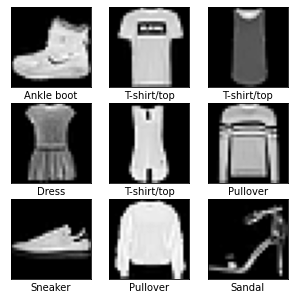

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', ' Bag', 'Ankle boot']
sample_size = 9
random_idx = np.random.randint(6000, size = sample_size)

plt.figure(figsize = (5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

# 3. 전처리 및 검증 데이터 셋 만들기

In [6]:
# 0~1범위로 변환
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical
# 각 데이터 레이블을 범주형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터 셋
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 test_size = 0.3,
                                                 random_state = 777)

# 4. 첫번째 모델

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()
first_model.add(Flatten(input_shape = (28, 28))) # 28*28 의 전처리 대신 Flatten 층 사용
first_model.add(Dense(64, activation = 'relu'))
first_model.add(Dense(32, activation = 'relu'))
first_model.add(Dense(10, activation = 'softmax'))

In [8]:
first_model.compile(optimizer = 'adam',
                   loss = 'categorical_crossentropy',
                   metrics = ['acc'])

first_history = first_model.fit(x_train, y_train,
                               epochs = 30,
                               batch_size =  128,
                               validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.6568 - acc: 0.7753 - val_loss: 0.4686 - val_acc: 0.8338
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4355 - acc: 0.8475 - val_loss: 0.4010 - val_acc: 0.8618
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4002 - acc: 0.8581 - val_loss: 0.3975 - val_acc: 0.8598
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3748 - acc: 0.8666 - val_loss: 0.3877 - val_acc: 0.8611
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3528 - acc: 0.8738 - val_loss: 0.3803 - val_acc: 0.8671
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3401 - acc: 0.8768 - val_loss: 0.3905 - val_acc: 0.8638
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3336 - acc: 0.8800 - val_loss: 0.3566 - val_acc: 0.8722
Epoch 8/30
329/329 [==============================] - 1s 2ms/step - loss: 0.

# 6. 두번째 모델

In [11]:
second_model = Sequential()
second_model.add(Flatten(input_shape = (28, 28)))
second_model.add(Dense(128, activation = 'relu'))
second_model.add(Dense(64, activation = 'relu'))
second_model.add(Dense(32, activation = 'relu'))
second_model.add(Dense(10, activation = 'softmax'))

second_model.compile(optimizer='adam',
                    loss = 'categorical_crossentropy',
                    metrics = ['acc'])

second_history = second_model.fit(x_train, y_train,
                               epochs = 30,
                               batch_size =  128,
                               validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.6180 - acc: 0.7831 - val_loss: 0.4372 - val_acc: 0.8455
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4189 - acc: 0.8506 - val_loss: 0.4017 - val_acc: 0.8541
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3789 - acc: 0.8609 - val_loss: 0.3612 - val_acc: 0.8715
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3448 - acc: 0.8744 - val_loss: 0.3742 - val_acc: 0.8634
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3249 - acc: 0.8798 - val_loss: 0.3632 - val_acc: 0.8719
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.3145 - acc: 0.8848 - val_loss: 0.3425 - val_acc: 0.8761
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.2992 - acc: 0.8889 - val_loss: 0.3708 - val_acc: 0.8619
Epoch 8/30
329/329 [==============================] - 1s 2ms/step - loss: 0.

# 7. 두 모델의 학습과정

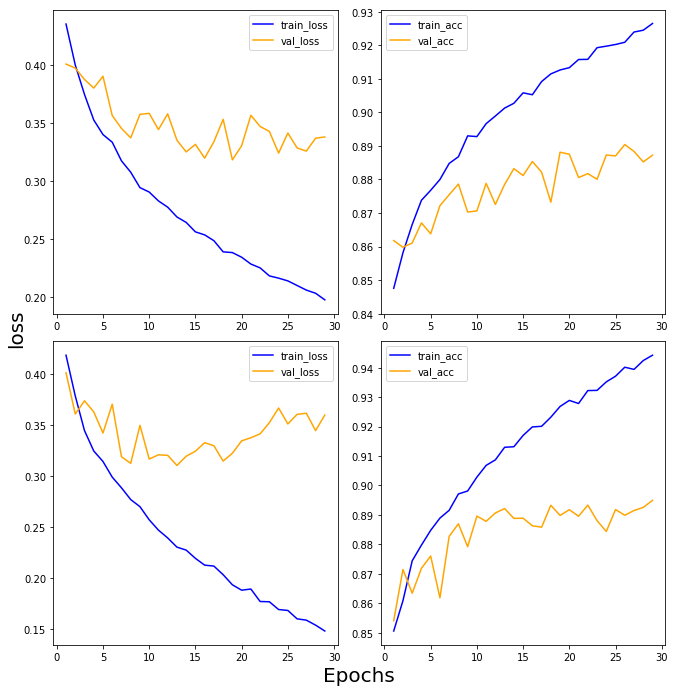

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history    
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1,1,1)
    # axis선과 ax의 축 레이블을 제거
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')    
    ax.spines['left'].set_color('none')    
    ax.spines['right'].set_color('none')    
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2,2,i+1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:],
                    color='blue', label='train_' +temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:],
                    color='orange', label=val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)